## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

#### Part IA - Data Wrangling

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Reading the dataset
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# .info shows the detailed info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
# Finding the number of unique users using .nunique
print(df['user_id'].nunique(), 'unique users')

290584 unique users


d. The proportion of users converted.

In [5]:
# Adding variables to make the calculation cleaner
converted_p = df['converted'].sum()
users_p = df['user_id'].nunique()

# Printing the output and using round() and int() to turn the float to an integer
print('Proportion of users converted:',int(round(converted_p/users_p*100)),'%')

Proportion of users converted: 12 %


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# Finding the unique values in 'landing_page'
print('Unique entries in \'landing_page\' column:', df['landing_page'].unique())
print('Unique entries in \'group\' column:', df['group'].unique())

Unique entries in 'landing_page' column: ['old_page' 'new_page']
Unique entries in 'group' column: ['control' 'treatment']


In [7]:
# Checking each column for conditions, '!=' means to not equal to and '==' means equal to

# Checking for 'not equal to' for 'treatment' and 'equal to' for 'new page' and adding it to a variable
nolineup1 = df[(df['group']!='treatment') & (df['landing_page']=='new_page')]

# Checking for 'equal to' for 'treatment' and 'not equal to' for 'new page' and adding it to a variable
nolineup2 = df[(df['group']=='treatment') & (df['landing_page']!='new_page')]

# Counting the number of indexed rows for the results of the first variable
nolineup1 = nolineup1.shape[0]

# Counting the number of indexed rows for the results of the second variable
nolineup2 = nolineup2.shape[0]

# Adding both results to find the number of times 'new_page' and 'treatment' don't line up
print(nolineup1+nolineup2, 'times')

3893 times


In [8]:
# A less verbose method
print(df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0], 'times')

3893 times


#### Part IB - Data Cleaning

f. Do any of the rows have missing values?

In [9]:
# Checking the .info() for missing values manually
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [10]:
# Checking the rows for missing values automatically
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

No rows have missing values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
# Finding the answer using our previous technique
nolineup1x = df[(df['group']!='treatment') & (df['landing_page']=='old_page')]
nolineup2x = df[(df['group']=='treatment') & (df['landing_page']!='old_page')]
nolineup1x = nolineup1x.shape[0]
nolineup2x = nolineup2x.shape[0]
nolineup1x+nolineup2x

290585

In [12]:
# Finding the answer using .drop
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

# We use shape instead of .info to find the number of rows
df.shape[0]

290585

In [13]:
# Saving and reading the new dataframe
df.to_csv('ab_data2.csv', index=False)
df2 = pd.read_csv('ab_data2.csv')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [14]:
# Checking the data is correct
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
# Checking the unique user_ids
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
# Filter user_id column
df2[df2.user_id.duplicated(keep=False)].user_id

1876    773192
2862    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [18]:
# Displaying the duplicated entries
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
# Removing the duplicated entry
df2.drop_duplicates('user_id', inplace=True)

In [20]:
# Checking for the duplicated entry by querying the same user_id
df2.query("user_id == '773192'")

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


#### Part IC - Data Analysis

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
# Using the average of converted users to find the probability of a user converting regardless of group
print(round(df2.converted.mean(),4))

0.1196


0.1196 or 12% is the average probability regardless of page so we will use this value as a baseline figure.

b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
# Filtering the 'control' entry in the 'group' column then assigning it to a variable
control_converted = df2.query("group == 'control'")

# Checking the filtered dataframe
control_converted.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [23]:
# Finding the probability of a user in the control group converting on the old page
print(round(control_converted.converted.mean(),4))

0.1204


Filtering just the 'control' group, the average probability is 0.1204 or 12%, the difference of probability is just +0.0008. Basically no difference compared to the baseline.

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
# Filtering the 'treatment' entry in the 'group' column then assigning it to a variable
treatment_converted = df2.query("group == 'treatment'")

# Checking the filtered dataframe
treatment_converted.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [25]:
# Finding the probability of a user in the treatment group converting on the new page
print(round(treatment_converted.converted.mean(),4))

0.1188


Again, filtering just the 'treatment' group, the average probability is 0.1188 or 12%, the difference of probability is just -0.0016. Basically no difference compared to the baseline again.

d. What is the probability that an individual received the new page?

In [26]:
# Filtering the 'new_page' entry in the 'landing_page' column then assigning it to a variable
newpage_converted = df2.query("landing_page == 'new_page'")

# Checking the filtered dataframe
newpage_converted.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [27]:
# Calculating the answer
print(round(newpage_converted.shape[0]/df2.shape[0],4))

0.5001


According to the results the probability of an individual receiving the new page is 0.5001, so half.

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer:** From our results, we can see that changing the group or the page had a negligable difference to the probability the individual would convert. We saw a 12% baseline conversion rate when the page was disregarded in (a). We also saw a 0.08% increase in conversions when the 'control' group was filtered (b), then 0.16% decrease when the 'treatment' group was filtered (c). Each test shows that the conversion rate did not change enough to make me believe that there is sufficient evidence to say that the new treatment page leads to more conversions. Also, because the new page and old page got 50/50 exposure to the individuals (d), the results can be deemed fair.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### Part IIA - Hypothesis

$H_0: Pold \ge Pnew$

The Null Hypothesis states the probability of users who convert from the old landing page 'old_page' is equal to or greater than the probability of users who convert from the new landing page 'new_page'.

$H_1: Pold<Pnew$ 

The Alternative Hypothesis states the probability of users who convert from the new landing page 'new_page' is equal to or greater than the probability of users who convert from the old landing page 'old_page'.

**Note:** 
* $p_{old}$ and $p_{new}$ are the converted rates for the old page and new page respectively. 
* $H_0$ is our null hypothesis and is assumed to be true before using data, $H_1$ is our alternative hypothesis.

#### Part IIB - Sampling Distribution for Convert Rates

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [28]:
# null_p_new 'treatment' convert rate
null_p_new = (df2['converted'] == 1).mean() 

print(round(null_p_new,4))

0.1196


b. What is the **convert rate** for $p_{old}$ under the null? <br>

In [29]:
# null_p_old 'control' convert rate
null_p_old = null_p_new

print(round(null_p_old,4))

0.1196


c. What is $n_{new}$?

In [30]:
# n_new is the total sample size of the new landing page
n_new = df2.query('landing_page == "new_page"').shape[0]
print('There are', "{:,}".format(n_new),'samples in the treatment group.')

There are 145,310 samples in the treatment group.


d. What is $n_{old}$?

In [31]:
# n_new is the total sample size of the old landing page
n_old = df2.query('landing_page == "old_page"').shape[0]
print('There are', "{:,}".format(n_old),'samples in the control group.')

There are 145,274 samples in the control group.


There are 145,273 are in the control group.

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [32]:
# Simulating n_new transactions with a convert rate of null_p_new
# n = converted number, p = conversion rate, size = sample size
new_page_converted = np.random.binomial(n = 1, p = null_p_new, size = n_new) 

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [33]:
# Simulating n_old transactions with a convert rate of null_p_old
# n = converted number, p = conversion rate, size = sample size
old_page_converted = np.random.binomial(n = 1, p = null_p_old, size = n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [34]:
# Using .mean of each group then subtracting them to find the p_new - p_old value
p_difference = new_page_converted.mean() - old_page_converted.mean()

print(round(p_difference,4))

0.001


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [35]:
# Creating 10,000 simulations of Pnew - Pold and assigning them to variables, then dividing them by their sample sizes
new_converted_simulated = np.random.binomial(n = n_new, p = null_p_new, size = 10000)/n_new # 145310 samples
old_converted_simulated = np.random.binomial(n = n_old, p = null_p_old, size = 10000)/n_old # 145274 samples

# Applying a variable to the difference in convert rates between the groups
p_diffs = new_converted_simulated - old_converted_simulated

# Reading our new array
p_diffs

array([ 0.00164974,  0.00113357, -0.00053188, ...,  0.00160819,
       -0.00086943,  0.00036265])

In [36]:
# Calculating the mean and standard deviation of the sampling distribution then assigning them to variables
p_diffs_std = np.array(p_diffs).std()
p_diffs_mean = np.array(p_diffs).mean()

# Calculation
print('p_diffs Standard Deviation:',p_diffs_std, '\np_diffs Mean:', p_diffs_mean)

p_diffs Standard Deviation: 0.0012184748026115395 
p_diffs Mean: -8.796601872536021e-06


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  12.,  104.,  498., 1569., 2750., 2707., 1634.,  598.,  120.,
           8.]),
 array([-4.60675456e-03, -3.69341552e-03, -2.78007647e-03, -1.86673742e-03,
        -9.53398375e-04, -4.00593281e-05,  8.73279719e-04,  1.78661877e-03,
         2.69995781e-03,  3.61329686e-03,  4.52663591e-03]),
 <a list of 10 Patch objects>)

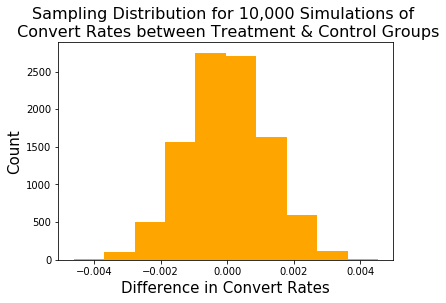

In [37]:
# Plotting our histogram, the results can vary slightly based on each run

# Title
plt.title('Sampling Distribution for 10,000 Simulations of \n Convert Rates between Treatment & Control Groups', fontsize = 16)

# Labels
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Difference in Convert Rates', fontsize = 15);

# Plotting the histogram
plt.hist(x = p_diffs, color = 'orange')

#### Part IIC - Using the P-Value

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [38]:
# Assigning the probability of a user in the each group converting to 'actual_p'
actual_p_old = control_converted.converted.mean()
actual_p_new = treatment_converted.converted.mean()

# Calculating the actual difference in convert rates between the two groups
actual_p_diff = actual_p_new - actual_p_old
print(round(actual_p_diff, 3))

-0.002


In [39]:
# Difference in percentage
print(round(actual_p_diff, 4)*100,'%')

-0.16 %


In [40]:
# Assigning the proportion of sampled differences 'p_diffs' greater than the actual difference to a variable 'p_value'
p_value = (p_diffs > actual_p_diff).mean()
p_value

0.9008

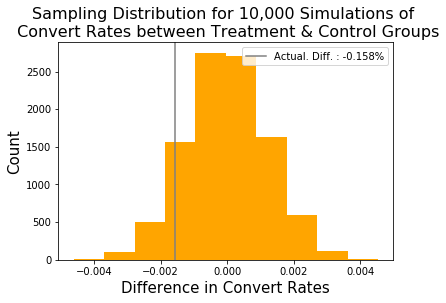

In [41]:
# Plotting our histogram with axvline for 'actual_p_diff'

# Title
plt.title('Sampling Distribution for 10,000 Simulations of \n Convert Rates between Treatment & Control Groups', fontsize = 16)

# Labels
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Difference in Convert Rates', fontsize = 15);

# Plotting the histogram
plt.hist(x = p_diffs, color = 'orange')

# Axvline
plt.axvline(x = actual_p_diff, color = 'grey', label = 'Actual. Diff. : {}%'.format(round(actual_p_diff*100, 3)))

plt.legend(loc='upper right');

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:** I assigned the variable of 'actual_p_old' and 'actual_p_new' to the conversion rates of the original samples from the control and treatment groups. Next, I used a new variable 'p_value' to calculate the difference between the two previous variables I created. The p-value is a number, calculated from our statistical test, in our case 'p_diffs'. The p-value describes how likely we are to find a specific set of observations if the null hypothesis or $H_0$ were true. From our results we can conclude there would be just a 0.16% difference between the conversion rates new and old pages. Also, according to the p_value being 0.9 or 90% (shown on the right hand side of the axvline). This exceeds the tolerance for our 'Type I Error Rate' of 0.05 or 5%, so there is not enough evidence to reject the null hypothesis. Our conclusion is the convert rate of users from the old page is equal to or larger than that of users in the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [42]:
convert_old = (df2.query('landing_page == "old_page"')['converted'] == 1).sum()
convert_new = (df2.query('landing_page == "new_page"')['converted'] == 1).sum()
n_old = df2.query('landing_page == "old_page"')['converted'].shape[0]
n_new = df2.query('landing_page == "new_page"')['converted'].shape[0]

#### Part IID - Two-Sample Z-Test

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

**Method:** We will use a Two-sample Z-Test to compute our test statistic for Z-Score and P-Value.

In [43]:
# Importing the statmodels library to calculate the Z-Score and P-Value for Z-Test
import statsmodels.api as sm

# Assigning a variable to ztest, n_old and n_new are the number of rows associated with the old and new pages respectively
z_score, p_value_test = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

# Printing the Z-Test results with labels
print('Z-Score:', z_score, '\nP-Value:', p_value_test)

Z-Score: 1.3109241984234394 
P-Value: 0.9050583127590245


In [44]:
# Computing our Z-score and P-Value from sampling distribution for our Two-sample Z-Test
z_score_2 = (p_diffs_mean - actual_p_diff) / p_diffs_std
z_score_2, p_value_test

# Printing the Z-Test 2 results with labels
print('Z-Score from Sampling Distribution:', z_score_2, '\nP-Value:', p_value_test)

Z-Score from Sampling Distribution: 1.2880384396289997 
P-Value: 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:** The P-Value is 0.9 which is clearly larger than 0.05, the Type I Error Rate. This is the same as the P-Value in part **j**. The Z-Scores from using the ztest and sampling distribution are similar at 1.310 and 1.316, so we can not reject the null hypothesis.

**Conclusion:**
The results from parts **j.** and **k.** are the same as the results from our Two-Sample Z-Test. Based on this, there is still no evidence to reject the null hypothesis. The conclusion is that the conversion rates of the new page are not larger than that of the old page. For the null hypothesis to be true, the conversion rate of the old page must be equal to or larger than the conversion rate of the new page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

#### Part IIIA - Comparing Conversion vs Landing Page

**Answer:** We should use Binary Logistic Regression since there are just two variables to compare, whether or not the new landing page increased conversions. Logistic regression is a well-known statistical method for predicting binary classes such as conversions of a landing page.

Linear regression is good for things like house prices and stock prices since it gives us a continous output. However, this would not be helpful in our case since we are using binary classes.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [45]:
# Assigning a copy of the latest dataframe to 'df_reg' 
df_reg = df2.copy()
df_reg.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [46]:
# Adding the intercept column to the new dataframe copy with a value of 1
df_reg['intercept'] = 1
df_reg.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [47]:
# Creating our dummy variable column which counts if the user is shown the new page and 0 for the old page
ab_dummy = pd.get_dummies(data = df_reg['landing_page'])['new_page']

# Joining the dummy column to our new dataframe
df_reg = df_reg.join(ab_dummy)

# Renaming our new column to 'ab_page'
df_reg.rename(columns = {'new_page':'ab_page'}, inplace = True)

# Displaying our finished dataframe
df_reg.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [48]:
# Creating a logistic regression model for conversion vs page.
logr_mod = sm.Logit(df_reg['converted'], df_reg[['intercept', 'ab_page']])
results = logr_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [49]:
# Creating our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 28 Dec 2020   Pseudo R-squ.:               8.077e-06
Time:                        22:05:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [50]:
# Is a result less than 1? If so, calculate the reciprocal to change to a unit decrease. Ignore the intercept.

# Showing the coef values
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [51]:
# Calculating the convert rate % for the old page vs the new page
cv_rate = 1/np.exp(results.params.ab_page)*100-100 # Calculating the reciprocal for values less than 1 by adding '1/' to change to unit increase

# Printing our result
print("{0:+.02f}".format(cv_rate),'%', 'Increased Conversion Rate vs New Page')

+1.51 % Increased Conversion Rate vs New Page


The results from all tests including **Part II** point towards the conclusion that the new page shows no obvious improvement of conversion rates over the old page. In fact, the old page shows a 1.51% increase in conversions vs the new page holding all other variables constant. The null and alternative hypothesis associated with our regression model matches the one from **Part II** as the results from the conversion rates are similar.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:** Our P-Value for the 'ab_page' is only 0.190 or 19%. However, it is still above the tolerance of 0.05 or 5% so the null hypothesis cannot be rejected. The reason our P-Value 'P>|z|' appears to differ from our hypothesis in **Part II** is because of the differences of the null hypothesis in logistic regression compared to Sampling Distribution and Two-Sample Z-Tests.

The definition of a P-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true. We could also verify our results using one and two-tailed tests to convert our P-Values.  

**Two-Tailed Test**

We need to find the proportion of more extreme values under $H_0$ by dividing the P-value from the logistic regression by 2

In [52]:
# Dividing the P-value from the logistic regression by 2
print(round(results.pvalues.ab_page/2,3))

0.095


**One-Tailed Test**

We need to find the proportion of more extreme values over our statistic $H_0$ obtained from our Sampling Distribution P-Value can be viewed below:

In [53]:
# Printing the P-Value from our Sampling Distribution Test
print(round(p_value_test,3))

# Converting P-Value by removing more extreme values manually
# print('Alternate calculation:', round(1-results.pvalues.ab_page/2,3))

0.905


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:** It is a good idea to consider other factors into our regression model because there might be other factors that influence a users decision to convert or not. This has the advantage of making our model more accurate and predicting better outcomes from additional variables. Disadvantages of adding more factors into our regression model could make it more difficult to manage or understand causing the process to be more time-consuming and less intuitive. 

#### Part IIIB - Comparing Conversion vs Landing Page in different Countries

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.**

In [54]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [55]:
# Reading the countries dataset
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [56]:
# Reading the df.new variable
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [57]:
# Checking if the number of rows matches our latest dataframe
r = 'rows'
print('countries.df:', countries_df.shape[0], r)
print('df_reg:', df_reg.shape[0], r)

countries.df: 290584 rows
df_reg: 290584 rows


In [58]:
# Checking if the number of unique users match our 'df_reg'
u = 'unique users'

# Filtering the results by using the 'user_id' column
print('countries.df:', countries_df.user_id.nunique(), u)
print('df_reg:', df_reg.user_id.nunique(), u)

countries.df: 290584 unique users
df_reg: 290584 unique users


In [59]:
# Finally checking if the unique users match the total row counts
row = countries_df.shape[0] + df_reg.shape[0]
uni = countries_df.user_id.nunique() + df_reg.user_id.nunique()

# Checking the number of rows match
print('Is the row count equal?', countries_df.shape[0] == df_reg.shape[0])

# Checking the unique number of users match
print('Are the unique users equal?', countries_df.user_id.nunique() == df_reg.user_id.nunique())

# Checking the number of unique users match the number of rows
print('Do the rows match the number of unique users?', row == uni)

Is the row count equal? True
Are the unique users equal? True
Do the rows match the number of unique users? True


In [60]:
# Adding the intercept column our df_new dataframe
df_new['intercept'] = 1
df_new.head()

# Creating our dummy variable column which counts if the user is shown the new page and 0 for the old page
ab_dummy = pd.get_dummies(data = df_new['landing_page'])['new_page']

# Joining the dummy column to our new dataframe
df_new = df_new.join(ab_dummy)

# Renaming our new column to 'ab_page'
df_new.rename(columns = {'new_page':'ab_page'}, inplace = True)

# Displaying our finished dataframe
df_new.head(3)

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1


In [61]:
# Creating the necessary dummy variables

# Finding the countries using '.value_counts'
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [62]:
df_new[df_new.country == 'UK'].head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1


In [63]:
# Listing the columns in our dataframe
list(df_new.columns)

['country',
 'timestamp',
 'group',
 'landing_page',
 'converted',
 'intercept',
 'ab_page']

In [64]:
# Since we have 3 countries but need 2 columns  
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country']) # Adding US, UK and CA to the dummy variable

# Reorder CA, UK, US (warning: the data for the columns was written in alphabetical order regardless of sorting)
df_new = df_new.reindex(columns= ['country','timestamp','group','landing_page','converted','intercept','ab_page', 
                                  'US', 'UK', 'CA'])

# Looking at the new columns we've added to the dataframe
df_new.tail()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA
user_id,,,,,,,,,,
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0,1,0,0
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0,0,1,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0,0,1,0
655535,CA,2017-01-09 13:30:47.524512,treatment,new_page,0,1,1,0,0,1
934996,UK,2017-01-09 00:30:08.377677,control,old_page,0,1,0,0,1,0


We will be using countries 'UK' and 'CA' to compare against the conversions.

In [65]:
# Creating a logistic regression model for conversion vs page and country.
logr_mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'CA']])
results2 = logr_mod2.fit()

# Creating our model
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Dec 2020   Pseudo R-squ.:               2.323e-05
Time:                        22:05:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

In [66]:
# Is a result less than 1? If so, calculate the reciprocal to change to a unit decrease. Ignore the intercept.
np.exp(results2.params)

intercept    0.136795
ab_page      0.985168
UK           1.009932
CA           0.960062
dtype: float64

In [67]:
# Calculating the convert rate % for the 'UK' results
uk_cv_rate = 1/np.exp(results2.params.UK)*100-100 # Calculating the reciprocal for values less than 1 by adding '1/' to change to unit increase
ca_cv_rate = 1/np.exp(results2.params.CA)*100-100

# Printing our result
print("{0:.02f}".format(uk_cv_rate),'%', 'UK Conversion Rate')
print("{0:+.02f}".format(ca_cv_rate),'%', 'CA Conversion Rate')
print("{0:.02f}".format(uk_cv_rate-ca_cv_rate),'%', 'Difference')

-0.98 % UK Conversion Rate
+4.16 % CA Conversion Rate
-5.14 % Difference


Does it appear that country had an impact on conversion? Provide the statistical output as well as a written response to answer this question.

Users from 'CA' were 4.16% more likely to convert holding all variables held constant. Users from the 'UK' were 0.98% less likely to convert accounting for a 5.14% difference between the two countries. This concludes that the country had a small impact on conversion with all variables held constant.

#### Part IIIC - Comparing Interactions Between Landing Page and Country

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if their significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [68]:
# Adding the variables for the interactions between page and country
df_new['ab_page_UK'] = df_new['ab_page'] * df_new['UK'] # Creating new columns for ab_page_UK using the sum of ab_page * 'UK'
df_new['ab_page_CA'] = df_new['ab_page'] * df_new['CA'] # Creating new columns for ab_page_UK using the sum of ab_page * 'CA'

# Looking at the new columns we've added to the dataframe
df_new.head(3)

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA,ab_page_UK,ab_page_CA
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0


In [69]:
# Creating a logistic regression model for conversion vs page and country.
logr_mod3 = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'CA', 'ab_page_UK', 'ab_page_CA']])
results3 = logr_mod3.fit()

# Creating our model
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Mon, 28 Dec 2020   Pseudo R-squ.:               2.417e-05
Time:                        22:05:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2729
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK             0.0045      0.018      0.257      0.797      -0.030       0.039
CA            -0.0073      0.037     -0.196      0.844      -0.080       0.065
ab_page_UK     0.0108      0.023      0.475      0.635      -0.034       0.056
ab_page_CA    -0.0674      0.052     -1.297      0.195      -0.169       0.034
==============================================================================
"""

In [70]:
# Calculating the convert rate % for the 'UK' results, 'abp' = ab_page
abp_uk_cv_rate = 1/np.exp(results3.params.ab_page_UK)*100-100 # Calculating the reciprocal for values less than 1 by adding '1/' to change to unit increase
abp_ca_cv_rate = 1/np.exp(results3.params.ab_page_CA)*100-100 # Calulating the percentage change

# Printing our result
print("{0:.02f}".format(abp_uk_cv_rate),'%', 'UK Conversion Rate vs New Page')
print("{0:+.02f}".format(abp_ca_cv_rate),'%', 'CA Conversion Rate vs New Page')
print("{0:+.02f}".format(abp_uk_cv_rate-abp_ca_cv_rate),'%', 'Difference')

-1.08 % UK Conversion Rate vs New Page
+6.98 % CA Conversion Rate vs New Page
-8.06 % Difference


Now we can observe the interaction between page and country to see if their effects on conversion. From our findings we can see 'ab_page_CA' has a 6.98% improved conversion rate using the old landing page vs the new page holding all variables constant. It is just -1.08% for the UK which equates to a -8.06% difference between the two countries. The clear winner here for the old page is 'CA'.

In [71]:
# Printing conversions
print(df_new['ab_page_UK'].sum(), 'UK conversions')
print(df_new['ab_page_CA'].sum(), 'CA conversions')

36106 UK conversions
7301 CA conversions


I have decided to add a bar graph below showing us the successful conversions per country using the '**ab_page**' metric. Then below that will be the conversion rate per country.

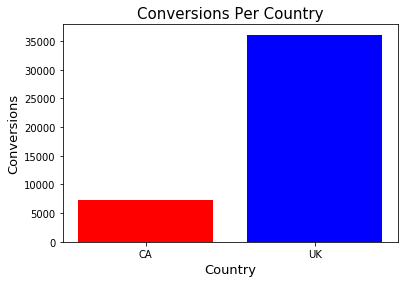

In [72]:
# Defining our variables
ca_plot = df_new['ab_page_CA'].sum()
uk_plot = df_new['ab_page_UK'].sum()
colors = ['red', 'blue']
Country = ['CA','UK']
Conversions = [ca_plot,uk_plot]

# Plotting our bar chart
plt.bar(Country, Conversions, color = colors)

# Labelling our bar chart
plt.title('Conversions Per Country', fontsize=15)
plt.xlabel('Country', fontsize=13)
plt.ylabel('Conversions', fontsize=13)
plt.show()

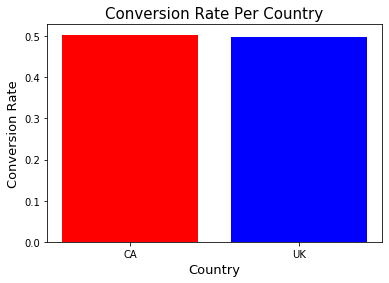

In [73]:
# Defining our variables
ca_plot_cr = df_new['ab_page_CA'].sum() / df_new.query("country == 'CA'").shape[0]
uk_plot_cr = df_new['ab_page_UK'].sum() / df_new.query("country == 'UK'").shape[0]
colors = ['red', 'blue']
Country = ['CA','UK']
Conversions = [ca_plot_cr,uk_plot_cr]

# Plotting our bar chart
plt.bar(Country, Conversions, color = colors)

# Labelling our bar chart
plt.title('Conversion Rate Per Country', fontsize=15)
plt.xlabel('Country', fontsize=13)
plt.ylabel('Conversion Rate', fontsize=13)
plt.show()

In [74]:
print('CA Users', df_new.query("country == 'CA'").shape[0])
print('UK Users', df_new.query("country == 'UK'").shape[0])
print('CA Conversions', df_new['ab_page_CA'].sum())
print('UK Conversions', df_new['ab_page_UK'].sum())
print('CA Conversion Rate', "{0:+.02f}".format(df_new['ab_page_CA'].sum() / df_new.query("country == 'CA'").shape[0]*100), '%')
print('UK Conversion Rate', "{0:+.02f}".format(df_new['ab_page_UK'].sum() / df_new.query("country == 'UK'").shape[0]*100), '%')

CA Users 14499
UK Users 72466
CA Conversions 7301
UK Conversions 36106
CA Conversion Rate +50.36 %
UK Conversion Rate +49.82 %


We can see that the country does not really affect the conversion rate as CA has a 50.36% rate and UK has 49.82%. The pseudo R-squared number has increased slightly from 2.32 to 2.4 as a result adding the ab_pages for each country. In theory, adding ab pages for the countries should help add more variables to the model for more accurate predictions. In reality, adding the countries to our original logistic regression model had the biggest effect. Our R number dropped from 8.07 to 2.32, the lower the R number, the less variablity in the results and the more the capability of our model to predict conversion improves.

#### Part IIID - Comparing Conversions vs Landing Page, Country and Time of Week

We are going to parse the dates into parts of the week. For example, we will split the week into 3 parts. For example: 

**Early Week** `EW` \
Monday, Tuesday \
**Mid Week** `MW` \
Wednesday, Thursday \
**Weekend** `WE` \
Friday, Saturday, Sunday

Then we are going to assign them as dummy variables to use in the logistic regression model. First, we have to group the days into the groups above then * by the ab_page to get usable data.

In [75]:
# Checking the dtype of 'timestamp' column
df_new.timestamp.head(1)

user_id
834778    2017-01-14 23:08:43.304998
Name: timestamp, dtype: object

In [76]:
# Converting 'timestamp' to datetime format
df_new['timestamp'] = pd.to_datetime(df_new['timestamp']) #, format = '%Y-%m-%d %H%:M%:S%.f')

In [77]:
# Checking the tail of the dataframe
df_new.tail()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA,ab_page_UK,ab_page_CA
user_id,,,,,,,,,,,,
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0,1,0,0,0,0
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0,0,1,0,0,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0,0,1,0,0,0
655535,CA,2017-01-09 13:30:47.524512,treatment,new_page,0,1,1,0,0,1,0,1
934996,UK,2017-01-09 00:30:08.377677,control,old_page,0,1,0,0,1,0,0,0


In [78]:
# Checking the dataframe
df_new.dtypes

country                 object
timestamp       datetime64[ns]
group                   object
landing_page            object
converted                int64
intercept                int64
ab_page                  uint8
US                       uint8
UK                       uint8
CA                       uint8
ab_page_UK               uint8
ab_page_CA               uint8
dtype: object

We can notice the timestamp is a string object so it needs to be converted into datetime format.

In [79]:
# Grouping the dates and setting the 'timestamp' column as the index
df_time = df_new.groupby([df_new['timestamp'].dt.date]).sum()
df_time.head(1)

,converted,intercept,ab_page,US,UK,CA,ab_page_UK,ab_page_CA
timestamp,,,,,,,,
2017-01-02,701,5712,2853.0,4028.0,1376.0,308.0,712.0,154.0


In [80]:
# Listing the objects in the index
df_time.index

Index([2017-01-02, 2017-01-03, 2017-01-04, 2017-01-05, 2017-01-06, 2017-01-07,
       2017-01-08, 2017-01-09, 2017-01-10, 2017-01-11, 2017-01-12, 2017-01-13,
       2017-01-14, 2017-01-15, 2017-01-16, 2017-01-17, 2017-01-18, 2017-01-19,
       2017-01-20, 2017-01-21, 2017-01-22, 2017-01-23, 2017-01-24],
      dtype='object', name='timestamp')

In [81]:
# Converting to datetime
df_new['timestamp'] = pd.to_datetime(df_new['timestamp']) #, format = '%Y-%m-%d %H%:M%:S%.f')
print(df_time.shape[0], 'rows')

23 rows


In [82]:
# Copying the 'timestamp' index to a new column called 'index' 
df_time['index'] = df_time.index 
df_time

,converted,intercept,ab_page,US,UK,CA,ab_page_UK,ab_page_CA,index
timestamp,,,,,,,,,
2017-01-02,701,5712,2853.0,4028.0,1376.0,308.0,712.0,154.0,2017-01-02
2017-01-03,1503,13208,6618.0,9215.0,3354.0,639.0,1671.0,318.0,2017-01-03
2017-01-04,1565,13119,6541.0,9270.0,3184.0,665.0,1606.0,337.0,2017-01-04
2017-01-05,1540,12932,6505.0,9017.0,3258.0,657.0,1625.0,331.0,2017-01-05
2017-01-06,1595,13353,6747.0,9286.0,3379.0,688.0,1726.0,347.0,2017-01-06
2017-01-07,1567,13213,6609.0,9250.0,3317.0,646.0,1656.0,345.0,2017-01-07
2017-01-08,1604,13387,6700.0,9293.0,3451.0,643.0,1755.0,333.0,2017-01-08
2017-01-09,1574,13243,6615.0,9184.0,3386.0,673.0,1695.0,346.0,2017-01-09
2017-01-10,1597,13350,6696.0,9252.0,3440.0,658.0,1720.0,352.0,2017-01-10


In [83]:
# Labelling the dates to numbers so I can order them in the index by descending order
df_time['day'] = '1','2', '3', '4', '5', '6', '7','1', '2', '3', '4', '5', '6', '7', '1','2', '3', '4', '5', '6', '7', '1','2'
df_time

,converted,intercept,ab_page,US,UK,CA,ab_page_UK,ab_page_CA,index,day
timestamp,,,,,,,,,,
2017-01-02,701,5712,2853.0,4028.0,1376.0,308.0,712.0,154.0,2017-01-02,1
2017-01-03,1503,13208,6618.0,9215.0,3354.0,639.0,1671.0,318.0,2017-01-03,2
2017-01-04,1565,13119,6541.0,9270.0,3184.0,665.0,1606.0,337.0,2017-01-04,3
2017-01-05,1540,12932,6505.0,9017.0,3258.0,657.0,1625.0,331.0,2017-01-05,4
2017-01-06,1595,13353,6747.0,9286.0,3379.0,688.0,1726.0,347.0,2017-01-06,5
2017-01-07,1567,13213,6609.0,9250.0,3317.0,646.0,1656.0,345.0,2017-01-07,6
2017-01-08,1604,13387,6700.0,9293.0,3451.0,643.0,1755.0,333.0,2017-01-08,7
2017-01-09,1574,13243,6615.0,9184.0,3386.0,673.0,1695.0,346.0,2017-01-09,1
2017-01-10,1597,13350,6696.0,9252.0,3440.0,658.0,1720.0,352.0,2017-01-10,2


In [84]:
# Grouping all the days by number so all days that = 1 are Mondays, 2 are Tuesdays etc.
df_day = df_time.groupby('day').sum()
df_day.rename(index={'1': 'Mon', '2': 'Tue', '3': 'Wed', '4': 'Thu', '5': 'Fri', '6': 'Sat', '7': 'Sun'}, inplace=True)
df_day

,converted,intercept,ab_page,US,UK,CA,ab_page_UK,ab_page_CA
day,,,,,,,,
Mon,5505,45440,22646.0,32021.0,11176.0,2243.0,5596.0,1145.0
Tue,5636,47148,23533.0,32937.0,11891.0,2320.0,5929.0,1176.0
Wed,4761,39565,19817.0,27853.0,9710.0,2002.0,4850.0,983.0
Thu,4705,39221,19694.0,27507.0,9709.0,2005.0,4812.0,1019.0
Fri,4624,39626,19934.0,27660.0,9975.0,1991.0,4986.0,1000.0
Sat,4793,39669,19768.0,27822.0,9881.0,1966.0,4876.0,991.0
Sun,4729,39915,19918.0,27819.0,10124.0,1972.0,5057.0,987.0


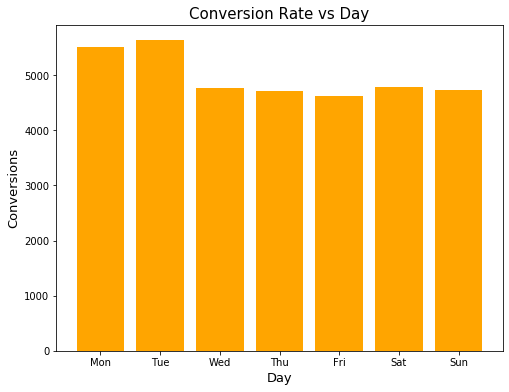

In [85]:
# Importing a new library to parse the datetime entries
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Adding variables
x = df_day.index
y = df_day['converted']

# Plotting our bar chart
plt.figure(figsize=(8,6)) # Add before plotting
plt.bar(x,y, color='orange')

# Labelling our bar chart
plt.title('Conversion Rate vs Day', fontsize=15)
plt.xlabel('Day', fontsize=13)
plt.ylabel('Conversions', fontsize=13)
plt.show()

We can see that the most conversions occur on Tuesday followed by Monday. The middle of the week performs the worst with the weekend improving on conversions.

In [86]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA,ab_page_UK,ab_page_CA
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [87]:
df_new.dtypes

country                 object
timestamp       datetime64[ns]
group                   object
landing_page            object
converted                int64
intercept                int64
ab_page                  uint8
US                       uint8
UK                       uint8
CA                       uint8
ab_page_UK               uint8
ab_page_CA               uint8
dtype: object

In [88]:
list(df_new.columns.values)

['country',
 'timestamp',
 'group',
 'landing_page',
 'converted',
 'intercept',
 'ab_page',
 'US',
 'UK',
 'CA',
 'ab_page_UK',
 'ab_page_CA']

In [89]:
# Monday and Tuesday = 'EW' or Early Week (2,3,9,10,16,17,23,24)
# Week 1
df_new['EW2'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 2).astype(int)
df_new['EW3'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 3).astype(int)
# Week 2
df_new['EW9'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 9).astype(int)
df_new['EW10'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 10).astype(int)
# Week 3
df_new['EW16'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 16).astype(int)
df_new['EW17'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 17).astype(int)
# Week 4
df_new['EW23'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 23).astype(int)
df_new['EW24'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 24).astype(int)

df_new['EW'] = df_new['EW2'] + df_new['EW3'] + df_new['EW9'] + df_new['EW10'] + df_new['EW16'] + df_new['EW17'] + df_new['EW23'] + df_new['EW24']
df_new.drop(columns=['EW2','EW3','EW9','EW10','EW16','EW17','EW23','EW24'],axis=1, inplace=True)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA,ab_page_UK,ab_page_CA,EW
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0,1


In [90]:
# Wednesday and Thursday = 'MW' or MidWeek (4,5,11,12,18,19)
# Week 1
df_new['MW4'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 4).astype(int)
df_new['MW5'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 5).astype(int)
# Week 2
df_new['MW11'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 11).astype(int)
df_new['MW12'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 12).astype(int)
# Week 3
df_new['MW18'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 18).astype(int)
df_new['MW19'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 19).astype(int)

df_new['MW'] = df_new['MW4'] + df_new['MW5'] + df_new['MW11'] + df_new['MW12'] + df_new['MW18'] + df_new['MW19']
df_new.drop(columns=['MW4','MW5','MW11','MW12','MW18','MW19'],axis=1, inplace=True)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA,ab_page_UK,ab_page_CA,EW,MW
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0,0,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0,1,0


In [91]:
# Friday, Saturday and Sunday = 'WE' or Weekend (6,7,8,13,14,15,20,21,22)
# Week 1
df_new['WE6'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 6).astype(int)
df_new['WE7'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 7).astype(int)
df_new['WE8'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 8).astype(int)
# Week 2
df_new['WE13'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 13).astype(int)
df_new['WE14'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 14).astype(int)
df_new['WE15'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 15).astype(int)
# Week 3
df_new['WE20'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 20).astype(int)
df_new['WE21'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 21).astype(int)
df_new['WE22'] = (pd.to_datetime(df_new['timestamp'].astype(str)).dt.day == 22).astype(int)

df_new['WE'] = df_new['WE6'] + df_new['WE7'] + df_new['WE8'] + df_new['WE13'] + df_new['WE14'] + df_new['WE15'] + df_new['WE20'] + df_new['WE21'] + df_new['WE22']
df_new.drop(columns=['WE6','WE7','WE8','WE13','WE14','WE15','WE20','WE21','WE22',],axis=1, inplace=True)
print(list(df_new.columns.values))
df_new.head()

['country', 'timestamp', 'group', 'landing_page', 'converted', 'intercept', 'ab_page', 'US', 'UK', 'CA', 'ab_page_UK', 'ab_page_CA', 'EW', 'MW', 'WE']


,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA,ab_page_UK,ab_page_CA,EW,MW,WE
user_id,,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0,1,0,0


In [92]:
# Adding the variables for the interactions between page and time of the week
df_new['ab_EW'] = df_new['ab_page'] * df_new['EW'] # Creating new columns for ab_page using the sum of ab_page * 'EW'
df_new['ab_MW'] = df_new['ab_page'] * df_new['MW'] # Creating new columns for ab_page using the sum of ab_page * 'MW'
df_new['ab_WE'] = df_new['ab_page'] * df_new['WE'] # Creating new columns for ab_page using the sum of ab_page * 'MW'
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA,ab_page_UK,ab_page_CA,EW,MW,WE,ab_EW,ab_MW,ab_WE
user_id,,,,,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0,0,0,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0,1,0,0,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0,1,0,0,1,0,0


In [93]:
# Creating a logistic regression model for conversion vs page, country and time of week.
logr_mod_time = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'ab_EW', 'ab_MW', 'ab_WE']])
results_time = logr_mod_time.fit()

# Creating our model
results_time.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Dec 2020   Pseudo R-squ.:               2.338e-05
Time:                        22:05:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1737
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0104   2.59e+05  -4.01e-08      1.000   -5.08e+05    5.08e+05
ab_EW          0.0156   2.59e+05   6.03e-08      1.000   -5.08e+05    5.08e+05
ab_MW         -0.0073   2.59e+05  -2.83e-08      1.000   -5.08e+05    5.08e+05
ab_WE         -0.0187   2.59e+05  -7.21e-08      1.000   -5.08e+05    5.08e+05
==============================================================================
"""

In [94]:
# Calculating the results
ew_cv_rate = 1/np.exp(results_time.params.ab_EW)*100-100 # Calculating the reciprocal for values less than 1 by adding '1/' to change to unit increase
mw_cv_rate = 1/np.exp(results_time.params.ab_MW)*100-100
we_cv_rate = 1/np.exp(results_time.params.ab_WE)*100-100

# Printing our results
print("{0:+.02f}".format(ew_cv_rate),'%', 'Early Week Conversion Rate vs New Page')
print("{0:+.02f}".format(mw_cv_rate),'%', 'Midweek Conversion Rate vs New Page')
print("{0:+.02f}".format(we_cv_rate),'%', 'Weekend Conversion Rate vs New Page')

# Differences
print("{0:+.02f}".format(np.mean([[ew_cv_rate] + [mw_cv_rate]]) - (we_cv_rate)),'%', 'Combined Results vs Weekend Results')

-1.55 % Early Week Conversion Rate vs New Page
+0.74 % Midweek Conversion Rate vs New Page
+1.89 % Weekend Conversion Rate vs New Page
-2.29 % Combined Results vs Weekend Results


This model is based on comparing the interaction between page and time of week. The Pseudo R-squared number has increased to 2.33 which tells us the model is good predicting conversion compared to our last model. Our last model was used to measure the interaction between page and country on conversion. However, conversion rate between times of the week are minimal with the weekend showing strongest with a 1.89% increased conversion rate on the old page if holding all variables constant. Our conclusion is that the weekend is the strongest part of the week for conversions with a +2.29% increased conversion rate on the old page vs the other days of the week on average.

#### Part IIIE - Comparing Conversion vs Landing Page and Time of Day

In [95]:
# Cleaning the columns for our next model
df_timeofday = df_new.drop(columns=['US', 'UK', 'CA', 'ab_page_UK', 'ab_page_CA','EW','MW','WE','ab_EW','ab_MW','ab_WE'],axis=1, inplace=True)

In [96]:
# Defining the dataframe as new variable
df_timeofday = df_new

# Converting the 'timestamp' column as a datetime object
df_timeofday['timestamp'] = pd.to_datetime(df_timeofday['timestamp']) 

# Creating a new datetime columns 'hour' and 'minute'
df_timeofday['hour'] = df_timeofday.timestamp.dt.hour
df_timeofday['minute'] = df_timeofday.timestamp.dt.minute 

# Splitting the timestamp into hour and minutes by using hour *60 + minute
df_timeofday['time_in_min'] = df_timeofday['hour']*60 + df_timeofday['minute']

# There are 24 hrs in a day, so we can split these hours into 4 sections
bin_edges = [0, 6*60, 12*60, 18*60, 24*60]
bin_labels = ['Overnight', 'Morning', 'Afternoon', 'Evening']
df_timeofday['time_of_day'] = pd.cut(df_timeofday['time_in_min'], bin_edges, labels=bin_labels)

# Looking at our new dataframe
df_timeofday.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,hour,minute,time_in_min,time_of_day
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,23,8,1388,Evening
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,14,44,884,Afternoon
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,14,4,844,Afternoon
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,3,14,194,Overnight
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,13,14,794,Afternoon


In [97]:
df_timeofday.columns

Index(['country', 'timestamp', 'group', 'landing_page', 'converted',
       'intercept', 'ab_page', 'hour', 'minute', 'time_in_min', 'time_of_day'],
      dtype='object')

In [98]:
# Removing the excess columns
df_timeofday.drop(columns=['hour', 'minute', 'time_in_min'],axis=1, inplace=True)
df_timeofday.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,time_of_day
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,Evening
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,Afternoon
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,Afternoon
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,Overnight
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,Afternoon


In [99]:
df_timeofday[['overnight', 'morning', 'afternoon', 'evening']] = pd.get_dummies(df_timeofday['time_of_day'])
df_timeofday = df_timeofday.drop('time_of_day', axis=1)
df_timeofday.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,overnight,morning,afternoon,evening
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0


In [100]:
# Adding the columns for the ab_page * time of day
df_timeofday['ab_morning'] = df_timeofday['ab_page'] * df_timeofday['morning']
df_timeofday['ab_afternoon'] = df_timeofday['ab_page'] * df_timeofday['afternoon']
df_timeofday['ab_evening'] = df_timeofday['ab_page'] * df_timeofday['evening']
df_timeofday['ab_overnight'] = df_timeofday['ab_page'] * df_timeofday['overnight']

# Removing unused columns
df_timeofday.drop(columns=['morning', 'afternoon', 'evening'],axis=1, inplace=True)

# Looking at the new columns we've added to the dataframe
df_timeofday.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,overnight,ab_morning,ab_afternoon,ab_evening,ab_overnight
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,0


In [101]:
log_mod_tod = sm.Logit(df_timeofday['converted'], df_timeofday[['intercept', 'ab_overnight', 'ab_morning', 'ab_afternoon', 'ab_evening']])
results_tod = log_mod_tod.fit()
results_tod.summary()

Optimization terminated successfully.
         Current function value: 0.366098
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Mon, 28 Dec 2020   Pseudo R-squ.:               6.274e-05
Time:                        22:05:29   Log-Likelihood:            -1.0638e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                  0.009686
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -1.9891      0.008   -246.771      0.000      -2.005      -1.973
ab_overnight    -0.0578      0.018     -3.151      0.002      -0.094      -0.022
ab_morning      -0.0163      0.018     -0.897      0.370      -0.052       0.019
ab_afternoon    -0.0033      0.018     -0.181      0.856      -0.038       0.032
ab_evening       0.0189      0.018      1.054      0.292      -0.016       0.054
================================================================================
"""

In [102]:
# Is a result less than 1? If so, calculate the reciprocal to change to a unit decrease. Ignore the intercept.
np.exp(results_tod.params)

intercept       0.136818
ab_overnight    0.943839
ab_morning      0.983846
ab_afternoon    0.996749
ab_evening      1.019125
dtype: float64

In [103]:
# Calculating the reciprocal for values less than 1 by adding '1/' to change to unit increase
overnight_cv_rate = 1/np.exp(results_tod.params.ab_overnight)*100-100
morning_cv_rate = 1/np.exp(results_tod.params.ab_morning)*100-100
afternoon_cv_rate = 1/np.exp(results_tod.params.ab_afternoon)*100-100
evening_cv_rate = 1/np.exp(results_tod.params.ab_evening)*100-100

# Printing our result
print("{0:+.02f}".format(overnight_cv_rate),'%', 'Overnight Conversion Rate vs New Page')
print("{0:+.02f}".format(morning_cv_rate),'%', 'Morning Conversion Rate vs New Page')
print("{0:+.02f}".format(afternoon_cv_rate),'%', 'Afternoon Conversion Rate vs New Page')
print("{0:+.02f}".format(evening_cv_rate),'%',  'Evening Conversion Rate vs New Page')
print(" ") # Return space

# Printing our difference
print("{0:+.02f}".format(np.mean([[morning_cv_rate] + [afternoon_cv_rate] + [evening_cv_rate]]) - (overnight_cv_rate)),'%', 'Combined Results vs Overnight Results')

+5.95 % Overnight Conversion Rate vs New Page
+1.64 % Morning Conversion Rate vs New Page
+0.33 % Afternoon Conversion Rate vs New Page
-1.88 % Evening Conversion Rate vs New Page
 
-5.92 % Combined Results vs Overnight Results


Users are 5.95% more likely to convert overnight on the old page vs new page other times of the day if all other variables are held constant. 1.64% are more likely to convert in the morning vs the new page but only 0.33% in the afternoon. The worst converion rate for the old page comes in the evening where 1.88% are more likely to convert with the new page. This data suggests it is more beneficial for the company to look into why this happens.

<a id='conclusions'></a>
## Conclusions

For this project we used Sampling Distribution, a Two-Sample Z-Test, and Logistic Regression to analyse A/B test data from an E-Commerce company. This data was used to compare how deploying different landing pages affected conversions.

Regarding the tests, our first observation was recording low P-Values from the Sampling Distribution and the Two-Sample Z-Test. We obtained this data by comparing the convert rates of the treatment and control groups (new_page vs old_page). Both tests failed to provide evidence to reject the null hypothesis. In laymans terms, the E-Commerce company would be advised against deploying a new landing page since the old page proved to equal or better the new page in terms of conversion rates.

Using Logistic Regression provided different P-Values from the Sampling Distribution and the Two-Sample Z-Test because the null hypothesis is calculated differently. Logistic Regression relies on predictor variables and thus the results are calculated differently.

Further analysis concluded that the time of week and the time of day also had an effect on conversion rate for the old page vs the new page. We used the timestamps from the data we received indicating the date and time of conversion. We split the data into groups, one for date and one for time. We then grouped the dates into `Early Week`, `Midweek`, and `Weekend`. Using that data we could create a model to predict which time of the week that gave us the most conversions From our results, we can see the weekend had the best conversion rates. We created our model for time of day vs conversion rate using the same basis. We  similarly grouped the time ranges into `Overnight`, `Morning`, `Afternoon`, and `Evening`. The results showed us that overnight conversion for the old page outperformed the other times of day on average by 5.92%. Hopefully this data provides a comprehensive analysis to help them make a decision on deploying a new landing page vs keeping the old one.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

## References

Removing .0 in an integer: https://stackoverflow.com/questions/35614496/how-to-remove-the-0-in-a-integter-in-python \
Check rows for missing values: https://www.datasciencemadesimple.com/check-count-missing-values-pandas-python-2/ \
Variable definition: https://www.w3schools.com/python/python_variables.asp \
Python Escape Characters https://www.w3schools.com/python/gloss_python_escape_characters.asp \
Constant vs continous https://diffsense.com/diff/constant/continuous \
Logistic Regression in Python: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python \
Append a plus sign for positive numbers: https://stackoverflow.com/questions/8827852/append-a-plus-sign-before-positive-numbers \
List Columns: https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/ \
Reorder Columns: https://www.datasciencemadesimple.com/re-arrange-or-re-order-the-column-of-dataframe-in-pandas-python-2/ \
Pandas to Datetime: https://www.dataindependent.com/pandas/pandas-to-datetime/ \
Column to Datetime: https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime \
Space Remover: https://miniwebtool.com/remove-spaces/ \
Drop Columns: https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe
Calendar: https://www.timeanddate.com/calendar/monthly.html?year=2017&month=1
Combine columns: https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe \
List columns: https://www.datasciencemadesimple.com/get-list-column-headers-column-name-python-pandas/